

# Project: Health Expenditure Data Analysis 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project we analyze and compare data from numerous datasets containing Health Expenditure by different entities across various geographical subregions.

>The following datasets in the field of healthcare economics have been selected for analysis from Gapminder https://www.gapminder.org/data/:
  * Government Share of Total Health Spending Percentage- Percentage of total health expenditure paid by government entities for various countries
  * Private Share of Total Health Spending Percentage- Percentage of total health expenditure paid by private entities for various countries
  * Out of Pocket Share of Total Health Spending Percentage- Percentage of total health expenditure paid directly out of pocket by individuals for various countries 
  * Total Health Spending Percent of GDP - The sum of public and private health expenditure as a percentage of GDP
  
>The following questions would be analyzed in this project:
 1.  Analyze the distributions of each entity.
 2.  Which subregion on an average has the most and least Government/Private/Out of Pocket share of Health Spending % or the most and least Total Health Spending as a % of GDP?
 3.  Are the entities correlated and if so how?
  
> The dataset 'Countries and Territories used by Gapminder' was downloaded from Gapminder to obtain the geographic subregions for the countries.

In [9]:
# importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties
> Loading the datasets and examining them

In [10]:
# Loading data

df_govt=pd.read_csv('government_share_of_total_health_spending_percent.csv')
df_pvt=pd.read_csv('private_share_of_total_health_spending_percent.csv')
df_oop=pd.read_csv('out_of_pocket_share_of_total_health_spending_percent.csv')
df_tot=pd.read_csv('total_health_spending_percent_of_gdp.csv')



In [11]:
# Retrieving info by looping through each dataframe

for i in [df_govt, df_pvt,df_oop,df_tot]:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 17 columns):
geo     190 non-null object
1995    187 non-null float64
1996    188 non-null float64
1997    188 non-null float64
1998    189 non-null float64
1999    189 non-null float64
2000    189 non-null float64
2001    189 non-null float64
2002    188 non-null float64
2003    188 non-null float64
2004    188 non-null float64
2005    188 non-null float64
2006    188 non-null float64
2007    188 non-null float64
2008    188 non-null float64
2009    188 non-null float64
2010    185 non-null float64
dtypes: float64(16), object(1)
memory usage: 25.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 17 columns):
geo     190 non-null object
1995    187 non-null float64
1996    188 non-null float64
1997    188 non-null float64
1998    189 non-null float64
1999    189 non-null float64
2000    189 non-null float64
2001    189 non-null float64
2002    

### Data Structure Adjustments

>Combining data from the four datasets (Government,Private,Out of Pocket, Total) and further joining with the 'Countries and Territories' dataset so that they can be grouped by subregions later.

>Unpivoting each dataset so that all years from 1995-2010 appear in one column. Using 'melt' method in pandas.

In [12]:
# Using melt in Pandas to unpivot each dataframe.

val=['1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
df_govt=pd.melt(df_govt,id_vars=['geo'],value_vars=val,var_name='year',value_name='govt')
df_pvt=pd.melt(df_pvt,id_vars=['geo'],value_vars=val,var_name='year',value_name='pvt')
df_oop=pd.melt(df_oop,id_vars=['geo'],value_vars=val,var_name='year',value_name='oop')
df_tot=pd.melt(df_tot,id_vars=['geo'],value_vars=val,var_name='year',value_name='tot')


In [13]:
# Retrieving info by looping through each dataframe

for i in [df_govt, df_pvt,df_oop,df_tot]:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 3 columns):
geo     3040 non-null object
year    3040 non-null object
govt    3008 non-null float64
dtypes: float64(1), object(2)
memory usage: 71.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 3 columns):
geo     3040 non-null object
year    3040 non-null object
pvt     3008 non-null float64
dtypes: float64(1), object(2)
memory usage: 71.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 3 columns):
geo     2368 non-null object
year    2368 non-null object
oop     2339 non-null float64
dtypes: float64(1), object(2)
memory usage: 55.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 3 columns):
geo     3040 non-null object
year    3040 non-null object
tot     3008 non-null float64
dtypes: float64(1), object(2)
memory usage: 71.3+ 

> Setting the index for the dataframes to be a multi-index comprising of the Geo and Year so they can be joined

In [14]:
# Setting index as a multi-index comprising of Geo and Year

for i in [df_govt,df_pvt,df_oop,df_tot]:
    i.set_index(['geo','year'],inplace=True)
    i.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3040 entries, (Afghanistan, 1995) to (Zimbabwe, 2010)
Data columns (total 1 columns):
govt    3008 non-null float64
dtypes: float64(1)
memory usage: 34.4+ KB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3040 entries, (Afghanistan, 1995) to (Zimbabwe, 2010)
Data columns (total 1 columns):
pvt    3008 non-null float64
dtypes: float64(1)
memory usage: 34.4+ KB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2368 entries, (Afghanistan, 1995) to (Zimbabwe, 2010)
Data columns (total 1 columns):
oop    2339 non-null float64
dtypes: float64(1)
memory usage: 26.8+ KB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3040 entries, (Afghanistan, 1995) to (Zimbabwe, 2010)
Data columns (total 1 columns):
tot    3008 non-null float64
dtypes: float64(1)
memory usage: 34.4+ KB


>Joining the 4 datasets using inner join. Out_of_pocket_share_data has data only for 148 countries. We need to analyze only for these countries that exist in the remaining datasets.

In [15]:
# Joining the dataframes on the index using Inner Join

df_joined=df_govt.join([df_pvt,df_oop,df_tot],how='inner')
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2368 entries, (Afghanistan, 1995) to (Zimbabwe, 2010)
Data columns (total 4 columns):
govt    2339 non-null float64
pvt     2339 non-null float64
oop     2339 non-null float64
tot     2339 non-null float64
dtypes: float64(4)
memory usage: 82.3+ KB


>Resetting the index using Pandas reset_index so the dataset has 'geo' and 'year' as columns

In [16]:
# Resetting the index

df_joined.reset_index(inplace=True)
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 6 columns):
geo     2368 non-null object
year    2368 non-null object
govt    2339 non-null float64
pvt     2339 non-null float64
oop     2339 non-null float64
tot     2339 non-null float64
dtypes: float64(4), object(2)
memory usage: 111.1+ KB


>Importing 'Countries and Territories used by Gapminder' dataset. Joined the datasets to obtain the matching regions.

In [17]:
# Reading 'Countries and Territories' dataset and merging with df_joined using inner join on country names.

df_region=pd.read_csv('Countries and territories used by Gapminder.csv')
df_region.head()
df_final=df_joined.merge(df_region, how = 'inner', left_on='geo',right_on='name')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 2367
Data columns (total 17 columns):
geo_x                           2368 non-null object
year                            2368 non-null object
govt                            2339 non-null float64
pvt                             2339 non-null float64
oop                             2339 non-null float64
tot                             2339 non-null float64
geo_y                           2368 non-null object
name                            2368 non-null object
Gapminder's 4 world regions     2368 non-null object
Gapminder's 8 subregions        2368 non-null object
Gapminder's 6 world regions     2368 non-null object
Members of G77 or OECD          2368 non-null object
Latitude                        2368 non-null float64
Longitude                       2368 non-null float64
UN member sinces                2368 non-null object
World bank region               2368 non-null object
World bank income group 2017    2368 no

In [18]:
# Dropping extranneous columns and renaming columns

df_final.drop(['geo_y','name','Members of G77 or OECD', 'Latitude','Longitude','World bank region','World bank income group 2017','UN member sinces'], axis=1,inplace=True)
df_final.rename(columns={'geo_x':'geo','Gapminder\'s 4 world regions':'4region','Gapminder\'s 6 world regions':'6region','Gapminder\'s 8 subregions':'subregion'},inplace=True)
df_final.head()

,geo,year,govt,pvt,oop,tot,4region,subregion,6region
0,Afghanistan,1995,NaN,NaN,NaN,NaN,asia,asia_west,south_asia
1,Afghanistan,1996,NaN,NaN,NaN,NaN,asia,asia_west,south_asia
2,Afghanistan,1997,NaN,NaN,NaN,NaN,asia,asia_west,south_asia
3,Afghanistan,1998,NaN,NaN,NaN,NaN,asia,asia_west,south_asia
4,Afghanistan,1999,NaN,NaN,NaN,NaN,asia,asia_west,south_asia


In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2368 entries, 0 to 2367
Data columns (total 9 columns):
geo          2368 non-null object
year         2368 non-null object
govt         2339 non-null float64
pvt          2339 non-null float64
oop          2339 non-null float64
tot          2339 non-null float64
4region      2368 non-null object
subregion    2368 non-null object
6region      2368 non-null object
dtypes: float64(4), object(5)
memory usage: 185.0+ KB



### Data Cleaning 

> Checking for Null values, duplicates and cleaning data


In [20]:
# Checking for Null

df_final.isnull().sum()

geo           0
year          0
govt         29
pvt          29
oop          29
tot          29
4region       0
subregion     0
6region       0
dtype: int64

>Dropping null values

In [21]:
# Dropping Null values

df_final.dropna(axis=0,how='any',inplace=True)
df_final.isnull().sum()

geo          0
year         0
govt         0
pvt          0
oop          0
tot          0
4region      0
subregion    0
6region      0
dtype: int64

In [22]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2339 entries, 7 to 2358
Data columns (total 9 columns):
geo          2339 non-null object
year         2339 non-null object
govt         2339 non-null float64
pvt          2339 non-null float64
oop          2339 non-null float64
tot          2339 non-null float64
4region      2339 non-null object
subregion    2339 non-null object
6region      2339 non-null object
dtypes: float64(4), object(5)
memory usage: 182.7+ KB


>Noticed that after dropping null values, the index isn't serial starting from 0. Reseting the index to start from 0.

In [23]:
# Resetting index

df_final.reset_index(inplace=True,drop=True)

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 9 columns):
geo          2339 non-null object
year         2339 non-null object
govt         2339 non-null float64
pvt          2339 non-null float64
oop          2339 non-null float64
tot          2339 non-null float64
4region      2339 non-null object
subregion    2339 non-null object
6region      2339 non-null object
dtypes: float64(4), object(5)
memory usage: 164.5+ KB


>Checking for duplicates

In [25]:
# Checking for duplicates

df_final.duplicated().sum()

0

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 9 columns):
geo          2339 non-null object
year         2339 non-null object
govt         2339 non-null float64
pvt          2339 non-null float64
oop          2339 non-null float64
tot          2339 non-null float64
4region      2339 non-null object
subregion    2339 non-null object
6region      2339 non-null object
dtypes: float64(4), object(5)
memory usage: 164.5+ KB


In [27]:
df_final.head()

,geo,year,govt,pvt,oop,tot,4region,subregion,6region
0,Afghanistan,2002,5.62,94.4,88.7,5.72,asia,asia_west,south_asia
1,Afghanistan,2003,6.83,93.2,87.6,6.82,asia,asia_west,south_asia
2,Afghanistan,2004,7.81,92.2,86.6,6.36,asia,asia_west,south_asia
3,Afghanistan,2005,11.60,88.5,83.1,6.63,asia,asia_west,south_asia
4,Afghanistan,2006,11.80,88.2,82.9,6.77,asia,asia_west,south_asia


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 - Analyze the distributions of each entity


>Abbreviation used below:
    * Govt Share of Total Health Spending - Govt
    * Private Share of Total Health Spending - Pvt
    * Out of Pocket Share of Total Health Spending - Oop
	* Total Health Spending Percent of GDP - tot
    


>Brief statistics for Govt, Pvt, Oop and tot across all countries and years

In [28]:
# Obtaining general statistics of the dataframe

df_final.describe()

,govt,pvt,oop,tot
count,2339.000000,2339.000000,2339.000000,2339.000000
mean,56.186003,43.787307,35.116375,6.221496
std,21.069566,21.094486,20.896900,2.870724
min,0.390000,4.130000,2.210000,1.120000
25%,40.450000,26.050000,16.850000,4.145000
50%,58.100000,41.900000,30.800000,5.650000
75%,74.000000,59.550000,50.900000,7.840000
max,95.900000,99.600000,99.600000,22.900000


> Grouping the data in the dataframe by subregion and determining the mean of values for govt, pvt, oop and tot. Finding the basic statistics across subregions and years

In [29]:
# Grouping the data by subregion and obtaining mean of the entities. 

df_avgyear=df_final.groupby('subregion')['govt','pvt','oop','tot'].mean() 
df_avgyear.reset_index(inplace=True)
df_avgyear

,subregion,govt,pvt,oop,tot
0,africa_north,54.360417,45.639583,41.647917,4.847813
1,africa_sub_saharan,46.069261,53.931560,41.846621,5.492244
2,america_north,56.754687,43.248438,20.946875,9.102812
3,america_south,56.287500,43.712500,28.037500,8.598125
4,asia_west,51.553529,48.450000,42.440931,4.805466
5,east_asia_pacific,63.717083,36.284560,28.005347,6.378287
6,europe_east,58.107022,41.893934,37.089743,7.070404
7,europe_west,73.831875,25.963000,19.554062,8.476594


In [30]:
# Obtaining general statistics after grouping

df_avgyear.describe()

,govt,pvt,oop,tot
count,8.000000,8.000000,8.000000,8.000000
mean,57.585172,42.390447,32.446125,6.846468
std,8.311761,8.369551,9.502602,1.735358
min,46.069261,25.963000,19.554062,4.805466
25%,53.658695,40.491590,26.240729,5.331136
50%,56.521094,43.480469,32.563621,6.724346
75%,59.509537,46.342188,41.697593,8.506977
max,73.831875,53.931560,42.440931,9.102812


>Distribution for each of the four features

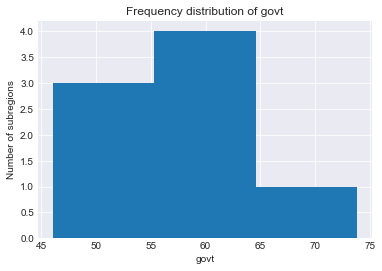

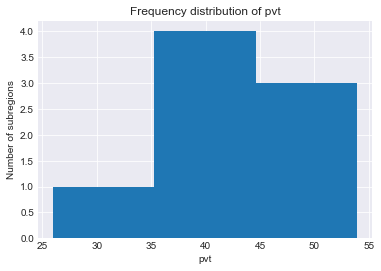

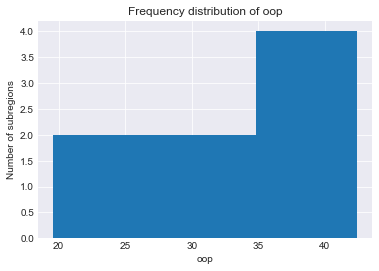

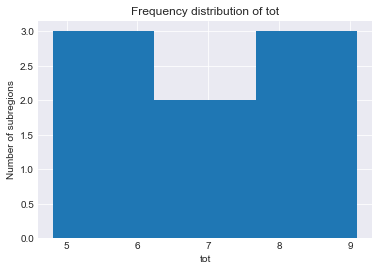

In [31]:
# Plotting histograms for each entity using matplotlib and seaborn

for i in ['govt', 'pvt','oop','tot']:
    sns.set_style('darkgrid')
    plt.hist(df_avgyear[i],bins=3)
    plt.xlabel(i)
    plt.ylabel('Number of subregions')
    plt.title('Frequency distribution of {}'.format(i))
    plt.show()

>Inference from the distributions- 
   * The distribution for Government Share of Total Health Spending is a random distibution skewed to the right. For majority of subregions in the world, the Government Share of Total Health Spending is between 55-65%
   * The distribution for Private Share of Total Health Spending is a random distribution skewed to the left. For majority of subregions in the world, the Private Share of Total Health Spending is between 35%-45%
   * The distribution for Out of Pocket Share of Total Health Spending is a Skewed left distribution. For majority of subregions in the world, the Out of Pocket Share of Total Health Spending is between 35%-42%
   * The distribution for Total Health Spending as a % of GDP is a bimodal distribution. 3 of 8 subregions have a Total Heath Spending as a % of GDP between 5%-6% and 3 of 8 subregions have a Total Health Spending as a % of GDP between 7.8%-9%.

### Research Question 2 - Which subregion on an average has the most and least Government/Private/Out of Pocket share of Health Spending % or the most and least Total Health Spending as a % of GDP

In [32]:
# Using Pandas Query to determine the region with max and min value

for i in ['govt','pvt','oop','tot']:
    print("The region with maximum {} is {} with a percentage of {}".format(i,list(df_avgyear[df_avgyear[i]==df_avgyear[i].max()]['subregion']),df_avgyear[i].max()))
    print("The region with minimum {} is {} with a percentage of {}".format(i,list(df_avgyear[df_avgyear[i]==df_avgyear[i].min()]['subregion']),df_avgyear[i].min()))

The region with maximum govt is ['europe_west'] with a percentage of 73.831875
The region with minimum govt is ['africa_sub_saharan'] with a percentage of 46.06926128590971
The region with maximum pvt is ['africa_sub_saharan'] with a percentage of 53.93155950752388
The region with minimum pvt is ['europe_west'] with a percentage of 25.962999999999994
The region with maximum oop is ['asia_west'] with a percentage of 42.44093137254897
The region with minimum oop is ['europe_west'] with a percentage of 19.55406249999999
The region with maximum tot is ['america_north'] with a percentage of 9.102812499999999
The region with minimum tot is ['asia_west'] with a percentage of 4.805465686274508


>Graphical representation of each entity- Government,Private,Out of Pocket, Total 

C:\Users\srathnagiriswaran\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


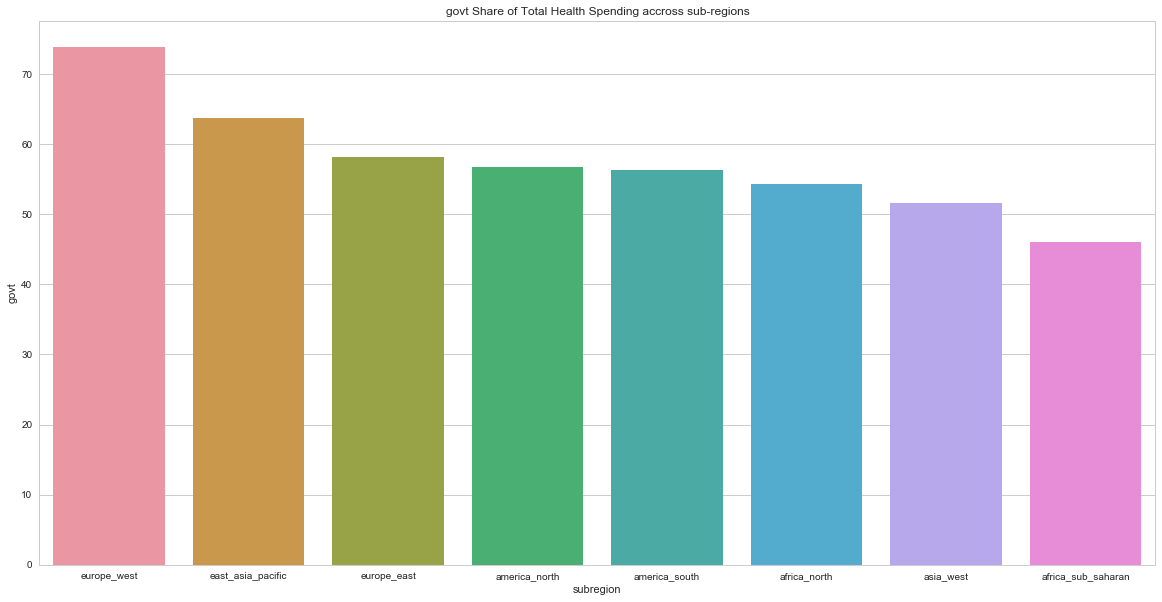

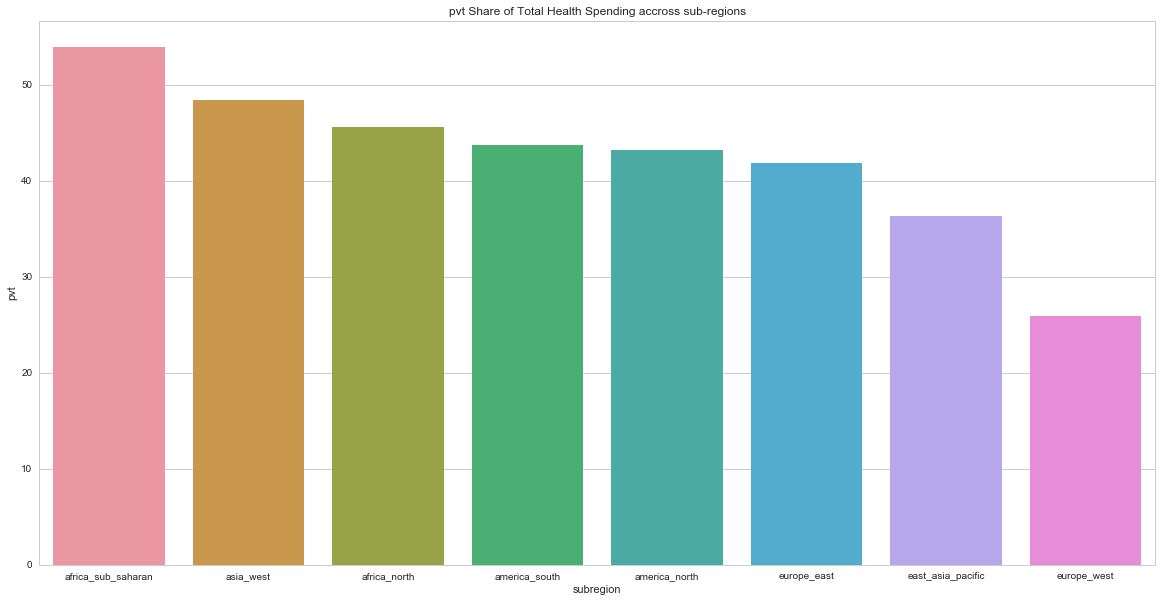

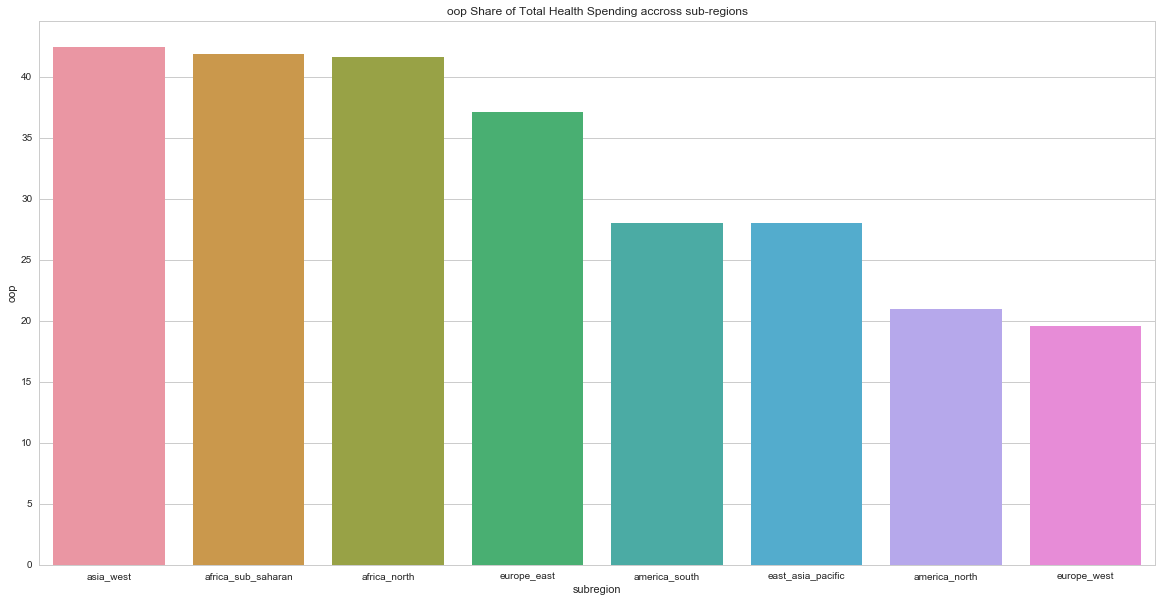

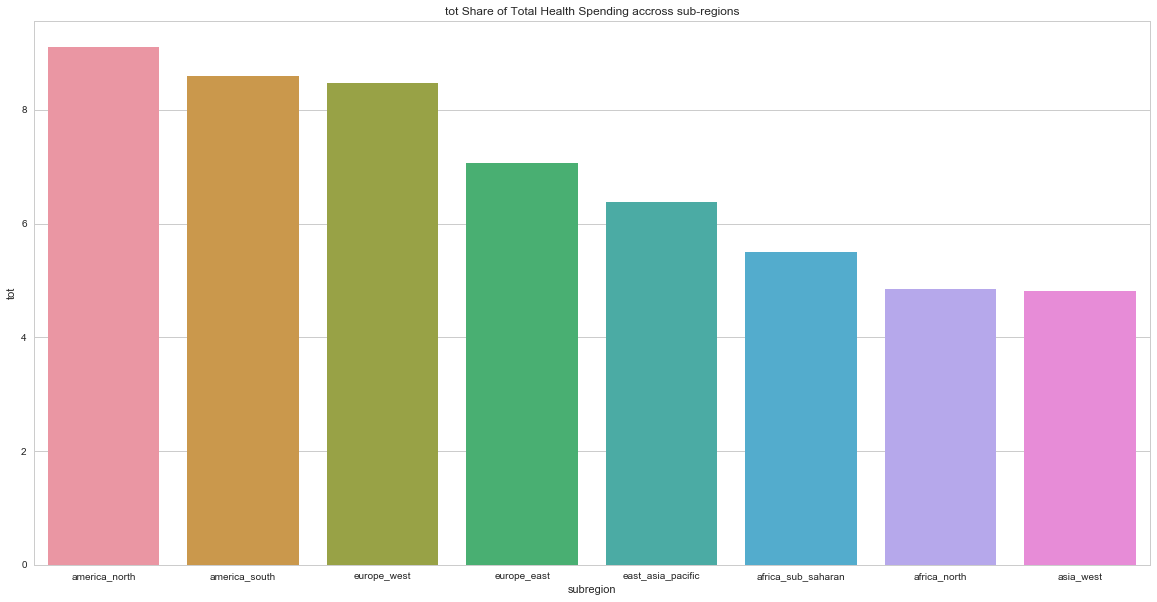

In [33]:
# Plotting Bar Plots for each entity using Matplotlib and Seaborn

for i in ['govt','pvt','oop','tot']:
    sns.set(style='whitegrid')
    plt.figure(figsize=(20,10))
    plt.legend()
    plt.title('{} Share of Total Health Spending accross sub-regions'.format(i))
    sns.barplot(y=i,x='subregion',data=df_avgyear.sort_values(i,ascending=False))
    plt.show();


### Research Question 3- Are the entities correlated and if so how?

>What is the correlation between each of the entities- Government/Private/Out of Pocket and Total

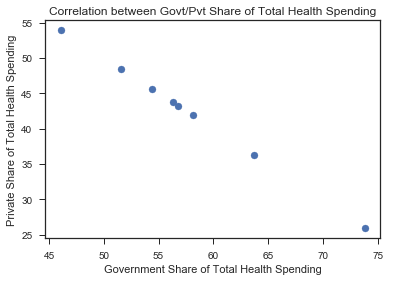

In [34]:
# Plotting scatterplots between Govt and Pvt using Matplotlib and Seaborn 

sns.set_style('ticks')
plt.scatter(x='govt', y='pvt',data= df_avgyear)
plt.xlabel('Government Share of Total Health Spending')
plt.ylabel('Private Share of Total Health Spending')
plt.title('Correlation between Govt/Pvt Share of Total Health Spending')
plt.show()

>Correlation based on Scatter Plots:  
>There appears to be a **strong negative correlation** between Goverment Share of Total Spending and Private Share of Total Spending

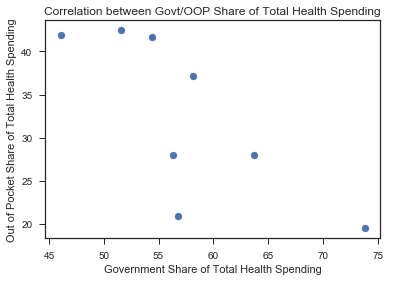

In [36]:
# Plotting scatterplots between Govt and Oop using Matplotlib and Seaborn 

plt.scatter(x='govt', y='oop',data= df_avgyear)
plt.xlabel('Government Share of Total Health Spending')
plt.ylabel('Out of Pocket Share of Total Health Spending')
plt.title('Correlation between Govt/OOP Share of Total Health Spending')
plt.show()

>Correlation based on Scatter Plots:  
>There appears to be **negative correlation** between Government Share of Total Spending and Out of Pocket Share of Total Spending

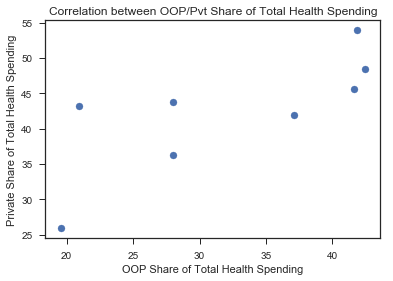

In [37]:
# Plotting scatterplots between Oop and Pvt using Matplotlib and Seaborn 

plt.scatter(x='oop', y='pvt',data= df_avgyear)
plt.xlabel('OOP Share of Total Health Spending')
plt.ylabel('Private Share of Total Health Spending')
plt.title('Correlation between OOP/Pvt Share of Total Health Spending')
plt.show()

>Correlation based on Scatter Plots:  
>There appears to be **positive correlation** between Private Share of Total Spending and Out-of-Pocket Share of Total Spending


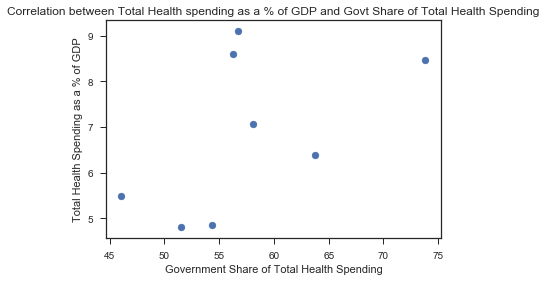

In [38]:
# Plotting scatterplots between Govt and tot using Matplotlib and Seaborn 

plt.scatter(x='govt', y='tot',data= df_avgyear)
plt.xlabel('Government Share of Total Health Spending')
plt.ylabel('Total Health Spending as a % of GDP')
plt.title('Correlation between Total Health spending as a % of GDP and Govt Share of Total Health Spending')
plt.show()

>Correlation based on Scatter Plots:  
>There appears to be **possitive corrrelation** between Government Share of Total Spending and Total Health Spending as a % of GDP
 

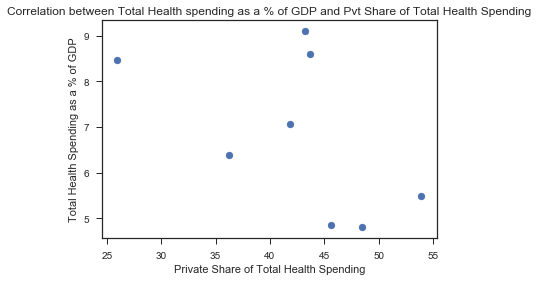

In [39]:
# Plotting scatterplots between Pvt and tot using Matplotlib and Seaborn 

plt.scatter(x='pvt', y='tot',data= df_avgyear)
plt.xlabel('Private Share of Total Health Spending')
plt.ylabel('Total Health Spending as a % of GDP')
plt.title('Correlation between Total Health spending as a % of GDP and Pvt Share of Total Health Spending')
plt.show()

>Correlation based on Scatter Plots:   
 There doesn't seem to be a correlation between 'Private Share of Total Health Spending' and 'Total Health Spending as a % of GDP'

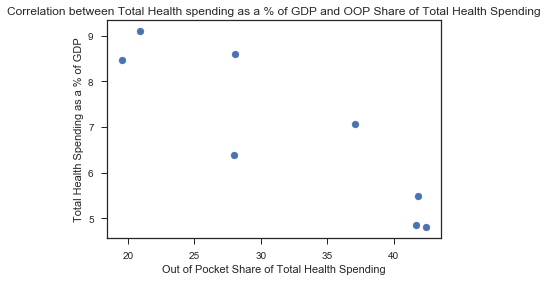

In [40]:
# Plotting scatterplots between Oop and Tot using Matplotlib and Seaborn 

plt.scatter(x='oop', y='tot',data= df_avgyear)
plt.xlabel('Out of Pocket Share of Total Health Spending')
plt.ylabel('Total Health Spending as a % of GDP')
plt.title('Correlation between Total Health spending as a % of GDP and OOP Share of Total Health Spending')
plt.show()

>Correlation based on Scatter Plots:  
 There appears to be **negative correlation** between Out of Pocket Share of Total Health Spending and Total Health Spending as % of GDP

<a id='conclusions'></a>
## Conclusions

>One of the limitations to these findings was that the 'Out of Pocket Share of Health spending' dataset only had data for 148 countries while the remaining datasets had records for 190 countries. In order to compare various entities from these datasets, we had to do a inner join while joining datasets there by reducing the number of countries for analysis. 

> To handle null data values, we removed the rows containing null values. 

>These may affect the findings below.

>To summarize the findings:

>**Europe West** has the highest 'Government Share of Health spending' (73.8%) and the lowest 'Private Share of Health Spending' (25.96%) and lowest 'Out of Pocket Share of Health Spending' (19.55%)  
  **Asia West** has the highest 'Out of Pocket Share of Health Spending' (42.44%) and the lowest 'Total Share of Health Spending' (4.8%)  
  **Africa Sub Saharan** has the lowest 'Government Share of Health spending' (46.06%) and the highest 'Private Share of Health spending' (53.93%)  
  **America North** has the highest 'Total Share of Health Spending (Public and Private) as a % of GDP' (9.10%)  
  
  >Correlation based on Scatter Plots:
>
 * There appears to be a **strong negative correlation** between Goverment Share of Total Spending and Private Share of Total Spending
 * There appears to be **positive correlation** between Private Share of Total Spending and Out-of-Pocket Share of Total Spending
 * There appears to be **negative correlation** between Government Share of Total Spending and Out of Pocket Share of Total Spending
 * There appears to be **possitive corrrelation** between Government Share of Total Spending and Total Health Spending as a % of GDP
 * There appears to be **negative correlation** between Out of Pocket Share of Total Health Spending and Total Health Spending as % of GDP

